Problem Analysis
-------------------------
In this data, we have the two independent variables namely, Position and Level.
There is one independent variable i.e., Salary. So, in this problem we have to 
train a Polynomial Regression model with this data to understand the correlation 
between the Level and Salary of the employee data in the company and be able to 
predict the salary for the new employee based on this data.

Reference site
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('PositionSalaries_Data.csv')

# Represents level
X = dataset.iloc[:, 1:-1].values

# Represents salary
y = dataset.iloc[:, -1].values
dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
# Training the Polynomial Regression model on the whole dataset
# Function is used to assign the degree of the polynomial line that we are going to plot. In this, the degree is set as 4.
from sklearn.preprocessing import PolynomialFeatures

# The class “LinearRegression” is also imported and is assigned to the variable “lin_reg” which is fitted with the X_poly and y for building the model.
from sklearn.linear_model import LinearRegression

# Variable X is converted to a new matrix X_Poly which consists of all the polynomial combinations of features with degree=4
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [4]:
# Predicting the Results
y_pred = lin_reg.predict(X_poly)

# Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45000,53356.643357
1,50000,31759.906760
2,60000,58642.191142
3,80000,94632.867133
4,110000,121724.941725
5,150000,143275.058275
6,200000,184003.496503
7,300000,289994.172494
8,500000,528694.638695
9,1000000,988916.083916


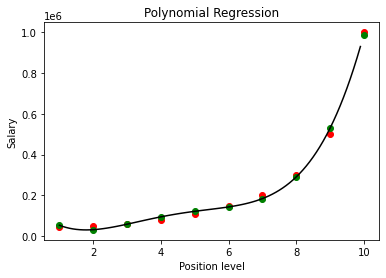

In [5]:
# Visualising the Polynomial Regression results
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

# Real values are plotted in red colour
plt.scatter(X, y, color = 'red')

# Predicted values are plotted in green colour
plt.scatter(X, y_pred, color = 'green')

# The Polynomial Regression line that is generated is drawn in Black color.
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()